<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
mdn = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(value=mdn)

Столбец Tenure — сколько лет человек является клиентом банка, хранит 909 пропусков, найти медиану или среднее в данном случае будет некорректно, поставим заглушку и в последующем будем обрабатывать её фильтром

In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data['Exited'].unique()

array([1, 0])

In [12]:
#Проверяем на наличие дубликатов
data.duplicated().sum()

0

In [13]:
#Удаляем столбец
data = data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Столбцы RowNumber, CustomerId и Surname, не несут никакой ценности для обучения модели, поэтому можно от них избавится

In [14]:
data.shape

(10000, 11)

In [15]:
#С помощью метода OHE подгоовим данные
data = pd.get_dummies(data, drop_first=True)
data.shape

(10000, 12)

In [16]:
#Переменные для признаков и целевого признака
features = data.drop(['Exited'], axis=1)
target = data['Exited']

In [17]:
#Деление на выборки
features_train, features_fv, target_train, target_fv = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [18]:
#Деление на выборки
features_test, features_valid, target_test, target_valid = train_test_split(
    features_fv, target_fv, test_size=0.5, random_state=12345)

In [19]:
print('Тренировочная выборка:', features_train.shape)
print('Валидационная выборка:', features_valid.shape)
print('Тестовая выборка:', features_test.shape)

Тренировочная выборка: (6000, 11)
Валидационная выборка: (2000, 11)
Тестовая выборка: (2000, 11)


Данные разбиты на три выборки: тренировочная, валидационная и тестовая; в соотношении 60/20/20
* Тренировочная выборка:
    - features_train
    - target_train
* Валидационная выборка:
    - features_valid
    - target_valid
* Тестовая выборка:
    - features_test
    - target_test

У признаков разный масштаб, чтобы избежать ловушки необходимо их стандартизировать. Это можно сделать с StandardScaler()

In [20]:
#Создадим список всех численных признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [21]:
#Создадим объект этой структуры и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

StandardScaler()

In [22]:
pd.options.mode.chained_assignment = None

In [23]:
#Сохраним проеобразование для тренировочный выборки 
features_train[numeric] = scaler.transform(features_train[numeric])

In [24]:
#Сохраним проеобразование для валидационной выборки
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [25]:
#Сохраним проеобразование для тестовой выборки
features_test[numeric] = scaler.transform(features_test[numeric])

**Подводя итоги:**
- В нашем расопоряжении данные из 10000 строк и 14 столбцов которые были успешно разделены на три выборки(обучающая, валидационная и тестовая), что касается стобцов, то здесть были отброшены признаки которые не влияют на обучение, это: 'RowNumber', 'Surname', 'CustomerId'.
- Во избежании дамми-ловушки данные были подготовлены методом OHE
- Последний шаг - численные признаки приведены к единному масштабу



Целевой признак Exited — факт ухода клиента, содержит два значения: 1 и 0. 
Следовательно работа предстоит с задачей классификации.

## Исследование задачи

**Случайный лес**

In [26]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=20)

# обучаем модель на тренировочной выборке
model.fit(features_train, target_train)

# получаем предсказание модели на валидационной выборке
predicted_valid = model.predict(features_valid)


print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Полнота" , recall_score(target_valid, predicted_valid))
print("Точность", precision_score(target_valid, predicted_valid))
print("F1-мера", f1_score(target_valid, predicted_valid))

Accuracy: 0.8465
Полнота 0.425531914893617
Точность 0.7377049180327869
F1-мера 0.5397301349325337
CPU times: user 457 ms, sys: 10.4 ms, total: 467 ms
Wall time: 477 ms


**Дерево решений**

In [27]:
%%time

model = DecisionTreeClassifier(random_state=12345)

# обучаем модель на тренировочной выборке
model.fit(features_train, target_train)

# получаем предсказание модели на валидационной выборке
predicted_valid = model.predict(features_valid)


print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Полнота" , recall_score(target_valid, predicted_valid))
print("Точность", precision_score(target_valid, predicted_valid))
print("F1-мера", f1_score(target_valid, predicted_valid))

Accuracy: 0.7865
Полнота 0.458628841607565
Точность 0.49489795918367346
F1-мера 0.4760736196319018
CPU times: user 31.6 ms, sys: 11.9 ms, total: 43.6 ms
Wall time: 40.5 ms


**Логистическая регрессия**

In [28]:
%%time

# инициализируем модель LinearRegression
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

# обучаем модель на тренировочной выборке
model.fit(features_train, target_train) 

# получаем предсказание модели на валидационной выборке
predicted_valid = model.predict(features_valid) 

result = accuracy_score(target_valid, predicted_valid)

print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Полнота" , recall_score(target_valid, predicted_valid))
print("Точность", precision_score(target_valid, predicted_valid))
print("F1-мера", f1_score(target_valid, predicted_valid))

Accuracy: 0.791
Полнота 0.18439716312056736
Точность 0.5165562913907285
F1-мера 0.27177700348432055
CPU times: user 80.5 ms, sys: 90.1 ms, total: 171 ms
Wall time: 157 ms


Низкое значние F1 говорит о низком качестве исследуемых моделей

Исследуем баланс классов целевого признака:

In [29]:
target_train.value_counts(normalize=True)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

In [30]:
target_valid.value_counts(normalize=True)

0    0.7885
1    0.2115
Name: Exited, dtype: float64

In [31]:
target_test.value_counts(normalize=True)

0    0.791
1    0.209
Name: Exited, dtype: float64

Во всех трёх выборках наблюдается сильный перекос в пользу значения "0"

**Проверка адекватности модели**

0    0.862
1    0.138
dtype: float64


<AxesSubplot:>

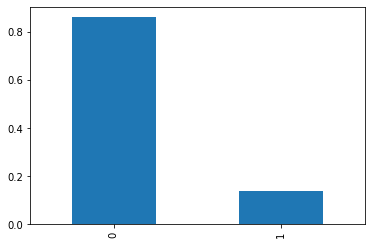

In [32]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_train, target_train)

# чтобы работала функция value_counts(),
# преобразовали результат к pd.Series
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize = True)

print(class_frequency)

class_frequency.plot(kind='bar')

0    0.893
1    0.107
dtype: float64


<AxesSubplot:>

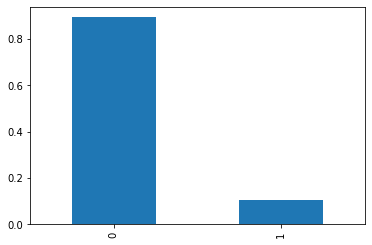

In [33]:
model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=10)
model.fit(features_train, target_train)

# чтобы работала функция value_counts(),
# преобразовали результат к pd.Series
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize = True)

print(class_frequency)

class_frequency.plot(kind='bar')

0    0.9245
1    0.0755
dtype: float64


<AxesSubplot:>

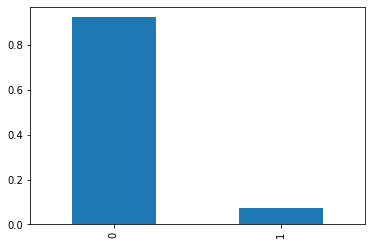

In [34]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)

# чтобы работала функция value_counts(),
# преобразовали результат к pd.Series
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)

print(class_frequency)

class_frequency.plot(kind='bar')

In [35]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [36]:
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_valid)
dummy_clf.score(features_valid, target_valid)

0.7885

Значение фиктивного классификатора равно 0.78, что ниже Accuracy исследуемых моделей

Построим матрицу ошибок для трех моделей:

In [37]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_train, target_train)
predicted_dtc = model.predict(features_valid)

confusion_matrix(target_valid, predicted_dtc)

array([[1477,  100],
       [ 247,  176]])

In [38]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train) 
predicted_lr = model.predict(features_valid)

confusion_matrix(target_valid, predicted_lr)

array([[1504,   73],
       [ 345,   78]])

In [39]:
model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=20)
model.fit(features_train, target_train)
predicted_rfc = model.predict(features_valid)

confusion_matrix(target_valid, predicted_rfc)

array([[1513,   64],
       [ 243,  180]])

Во всех трех случаях истинноположительных ответов меньше ложноотрицательных

Изучим значение AUC-ROC, для логистической регрессии

0.7386410142248726


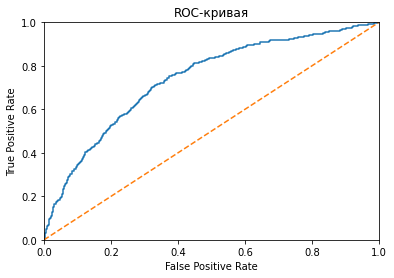

In [40]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)[:, 1]
probabilities_one_valid = probabilities_valid

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(auc_roc)

0.7546123276232964


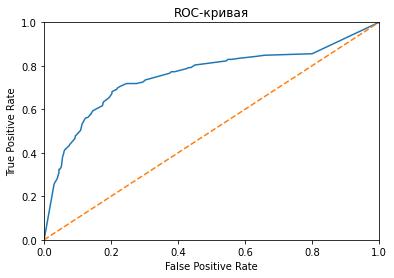

In [41]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)[:, 1]
probabilities_one_valid = probabilities_valid

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(auc_roc)

0.848231297717934


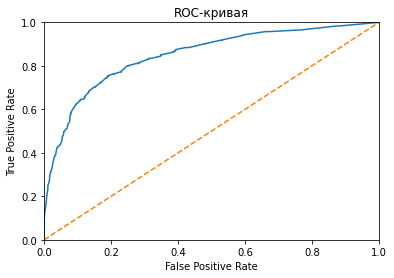

In [42]:
model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=20)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)[:, 1]
probabilities_one_valid = probabilities_valid

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(auc_roc)

auc_roc для логистической регрессии показывет результат - 0.7386679978592984
для случайного леса 0.84 - лучший показатель, у модели дерева решений 0.75

**Подводя итоги:**
- Исследовали метрики: Accuracy, Полнота, Точность, F1-мера; для трёх моделей 
- Исследовали баланс классов
- Проверили модель на адекватность
- Построили матрицу ошибок и изучили значение auc_roc

## Борьба с дисбалансом

Увеличим выборки с помощью техники upsample

In [43]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = 4
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [44]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

In [45]:
mmm = target_train_upsampled.value_counts(normalize=True)
mmm

0    0.501043
1    0.498957
Name: Exited, dtype: float64

<AxesSubplot:>

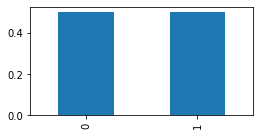

In [46]:
mmm.plot(kind='bar', figsize=(4, 2))

In [47]:
model_LR = LogisticRegression(random_state=12345, solver='lbfgs')
model_LR.fit(features_train_upsampled, target_train_upsampled)
m = model_LR.predict(features_valid)

print("F1:", f1_score(target_valid, m))

F1: 0.47619047619047616


0.7417306403666176


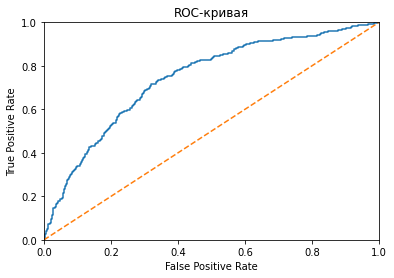

In [48]:
probabilities_valid = model_LR.predict_proba(features_valid)[:, 1]
probabilities_one_valid = probabilities_valid

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(auc_roc)

In [49]:
model_RFC = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=10, criterion='gini')
model_RFC.fit(features_train_upsampled, target_train_upsampled)
m = model_RFC.predict(features_valid)

print("F1:", f1_score(target_valid, m))

F1: 0.6066452304394426


0.8552402967600151


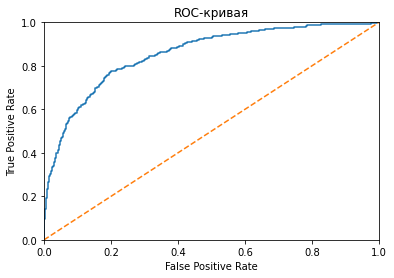

In [50]:
probabilities_valid = model_RFC.predict_proba(features_valid)[:, 1]
probabilities_one_valid = probabilities_valid

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(auc_roc)

In [51]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5, splitter='best')
model_DTC.fit(features_train_upsampled, target_train_upsampled)
m = model_DTC.predict(features_valid)

print("F1:", f1_score(target_valid, m))

F1: 0.5809128630705395


0.8355347481752318


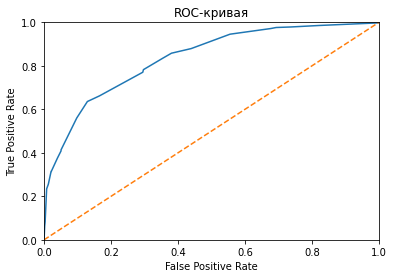

In [52]:
probabilities_valid = model_DTC.predict_proba(features_valid)[:, 1]
probabilities_one_valid = probabilities_valid

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(target_valid, probabilities_valid)
print(auc_roc)

Наилучший результат показывает модель Случайного леса, где F1 = 0.6
Хуже - Логистическая регрессия со значением F1: 0.477

Показатели roc_auc моделей после применения техники upsample показали следующие резултаты: 
- Логистическая регрессия с 0.73 увеличилась до 0.74
- Случайный лес с 0.84 до 0.85
- Дерево решений с 0.75 до 0.83

Посмотрим какой результат покажут модели если выборки уменьшить, это можно сделать с помошью техники downsampling

In [53]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


In [54]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [55]:
nnn = target_downsampled.value_counts(normalize=True)
nnn

0    0.501043
1    0.498957
Name: Exited, dtype: float64

<AxesSubplot:>

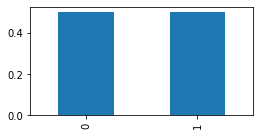

In [56]:
nnn.plot(kind='bar', figsize=(4, 2))

In [57]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
m = model.predict(features_valid)

print("F1:", f1_score(target_valid, m))

F1: 0.48417450812660395


In [58]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=10, criterion='gini')
model.fit(features_downsampled, target_downsampled)
m = model.predict(features_valid)

print("F1:", f1_score(target_valid, m))

F1: 0.5822550831792976


In [59]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, splitter='best')
model.fit(features_downsampled, target_downsampled)
m = model.predict(features_valid)

print("F1:", f1_score(target_valid, m))

F1: 0.608066184074457


Лучшее значение F1 у модели дерево решений, модель Случайного леса показала себя хуже по сравнению с предыдушим разом.
Что же касается Логистической регрессии, то значение F1 от предыдушего раза несильно отличается 0.47 и 0.48

**Подводя итоги:** Для борьбы с дисбалансов были использованы две техники: upsample и downsampling
- Хуже всего себя показала модель Логистической регрессии 0.47 и 0.48
- Лучше в upsample: модель случайного леса 0.60
- Лучше в downsampling: модель дерево решений 0.60

Для тестирования будем использовать модель Случайного леса

## Тестирование модели

In [60]:
model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=10, criterion='gini')
model_random_forest.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=10, n_estimators=80, random_state=12345)

In [61]:
predict_test = model_random_forest.predict(features_test)
result = accuracy_score(target_test, predict_test)

In [62]:
print("Accuracy:", accuracy_score(target_test, predict_test))
print("Полнота" , recall_score(target_test, predict_test))
print("Точность", precision_score(target_test, predict_test))
print("F1-мера", f1_score(target_test, predict_test))

Accuracy: 0.826
Полнота 0.6770334928229665
Точность 0.5705645161290323
F1-мера 0.6192560175054704


Исследуем значение AUC-ROC на тестовых данных

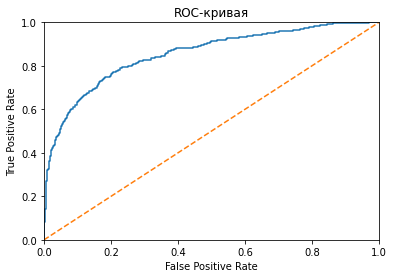

In [63]:
probabilities_test = model_random_forest.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

In [64]:
auc_roc = roc_auc_score(target_test, probabilities_test)
auc_roc

0.8540881568361773

Показатель AUC-ROC исследуемой модели равен 0.85

Создадим фиктивный классификатор и проверим модель на адекватность

In [65]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [66]:
dummy_clf.fit(features_test, target_test)
dummy_clf.predict(features_valid)
dummy_clf.score(features_valid, target_valid)

0.7885

**Подводя итоги:**
На тестовой выборке получили следующие значения:

- F1-мера 0.61
- AUC-ROC 0.85

Проверили модель на адекватность, значение фиктивного классификатора равно 0.78, что ниже значения Accuracy наилучшей модели(0.82)


**Общий вывод:**
В рамках проекта были представлены данные из «Бета-Банка». 
- Задача: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 
- Цель: построить модель с предельно большим значением F1-меры.

В процессе реализации проекта были выполнены следующие шаги:
- Подготовлены данные для последующих манипуляций;
- Для моделей: Случайный лес, Дерево решений, Логистическая регрессия, были исследованы следующие метрики: 
   - Accuracy, 
   - полнота, 
   - точность, 
   - F1-мера.
- Исследован баланс классов целевого признака;
- Проведена проверка адекватности;
- Построили матрицу ошибок для трех моделей;
- Проведены работы по борьбе с дисбалансом;
- Проведено тестирование модели 

Для тестирования была выбрана модель Случайного леса, т.к. после увеличения выборки показала наилучний результат F1 = 0.6 



На тестовой выборке получили следующие значения:

- Accuracy: 0.82
- Полнота 0.68
- Точность 0.56
- F1-мера 0.61
- AUC-ROC 0.85